<a href="https://colab.research.google.com/github/sivasamy1/data_analytics/blob/main/Forest_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PART I**

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).



In [ ]:
import pandas as pd
from tabulate import tabulate
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df_forest_fire = pd.read_csv('/content/drive/MyDrive/data_analytics/MINIPROJECT_5/forestfires.csv')
#print(tabulate(df_forest_fire, headers='keys', tablefmt='psql'))

###**1.1 Top 10 maximum burnt area happened on which month.**
###**Expected Output:**
###**month,area**

In [ ]:
df_burnt = df_forest_fire.sort_values(by='area', ascending=False).head(10)[['month', 'area']].reset_index(drop=True)

print(tabulate(df_burnt, headers='keys', tablefmt='psql'))

+----+---------+---------+
|    | month   |    area |
|----+---------+---------|
|  0 | sep     | 1090.84 |
|  1 | aug     |  746.28 |
|  2 | jul     |  278.53 |
|  3 | sep     |  212.88 |
|  4 | sep     |  200.94 |
|  5 | aug     |  196.48 |
|  6 | aug     |  185.76 |
|  7 | aug     |  174.63 |
|  8 | sep     |  154.88 |
|  9 | sep     |  105.66 |
+----+---------+---------+


In [ ]:
highest_burnt_area_each_month = df_forest_fire.groupby('month', as_index=False,)['area'].max()
highest_burnt_area_each_month1 = highest_burnt_area_each_month.sort_values(by='area', ascending=False)
highest_burnt_area_each_month = highest_burnt_area_each_month1.head(10)
print(highest_burnt_area_each_month)

   month     area
11   sep  1090.84
1    aug   746.28
5    jul   278.53
6    jun    70.32
0    apr    61.13
3    feb    51.78
10   oct    49.37
8    may    38.48
7    mar    36.85
2    dec    24.77


### **1.2 Highest temperature and lowest temperature for each month.**
### **Expected Output**:
### **month,highest_temp, lowest_temp**


In [ ]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df_temp_max = df_forest_fire.groupby('month', as_index=False)['temp'].max()
df_temp_min = df_forest_fire.groupby('month', as_index=False)['temp'].min()
df_temp = pd.merge(df_temp_max, df_temp_min, on='month', suffixes=('_max', '_min'))
df_temp['month'] = pd.Categorical(df_temp['month'], categories=month_order, ordered=True)
df_temp['month_index'] = df_temp['month'].cat.codes + 1
df_temp = df_temp.sort_values(by='month').reset_index(drop=True)
df_temp.columns = ['month', 'highest_temp', 'lowest_temp', 'month_index']
print(tabulate(df_temp, headers='keys', tablefmt='psql'))

+----+---------+----------------+---------------+---------------+
|    | month   |   highest_temp |   lowest_temp |   month_index |
|----+---------+----------------+---------------+---------------|
|  0 | jan     |            5.3 |           5.2 |             1 |
|  1 | feb     |           15.7 |           4.2 |             2 |
|  2 | mar     |           18.8 |           5.3 |             3 |
|  3 | apr     |           17.6 |           5.8 |             4 |
|  4 | may     |           18   |          11.3 |             5 |
|  5 | jun     |           28   |          10.6 |             6 |
|  6 | jul     |           30.2 |          12.6 |             7 |
|  7 | aug     |           33.3 |           5.1 |             8 |
|  8 | sep     |           30.2 |           9.8 |             9 |
|  9 | oct     |           21.7 |          11.3 |            10 |
| 10 | nov     |           11.8 |          11.8 |            11 |
| 11 | dec     |            5.1 |           2.2 |            12 |
+----+----

### **1.3 Monthly when highest wind and lowest wind happened.**
### **Expected Output:**
### **month,highest_wind, lowest_wind**


In [ ]:
df_wind_max = df_forest_fire.groupby('month', as_index=False)['wind'].max()
df_wind_min = df_forest_fire.groupby('month', as_index=False)['wind'].min()
df_wind = pd.merge(df_wind_max, df_wind_min, on='month', suffixes=('_max', '_min'))
df_wind['month'] = pd.Categorical(df_wind['month'], categories=month_order, ordered=True)
df_wind['month_index'] = df_wind['month'].cat.codes + 1
df_wind = df_wind.sort_values(by='month').reset_index(drop=True)
df_wind.columns = ['month', 'highest_wind', 'lowest_wind', 'month_index']
print(tabulate(df_wind, headers='keys', tablefmt='psql'))


+----+---------+----------------+---------------+---------------+
|    | month   |   highest_wind |   lowest_wind |   month_index |
|----+---------+----------------+---------------+---------------|
|  0 | jan     |            3.1 |           0.9 |             1 |
|  1 | feb     |            9.4 |           0.9 |             2 |
|  2 | mar     |            9.4 |           0.9 |             3 |
|  3 | apr     |            9.4 |           1.8 |             4 |
|  4 | may     |            4.9 |           4   |             5 |
|  5 | jun     |            9.4 |           1.3 |             6 |
|  6 | jul     |            8   |           0.9 |             7 |
|  7 | aug     |            8.9 |           0.4 |             8 |
|  8 | sep     |            7.6 |           0.9 |             9 |
|  9 | oct     |            5.4 |           0.9 |            10 |
| 10 | nov     |            4.5 |           4.5 |            11 |
| 11 | dec     |            8.5 |           4.9 |            12 |
+----+----

### **1.4 Highest and lowest relative humidity for each month.**
### **Expected Output:**
### **month,highest_rh, lowest_rh**


In [ ]:
df_hum_max = df_forest_fire.groupby('month', as_index=False)['RH'].max()
df_hum_min = df_forest_fire.groupby('month', as_index=False)['RH'].min()
df_hum = pd.merge(df_hum_max, df_hum_min, on='month', suffixes=('_max', '_min'))
df_hum['month'] = pd.Categorical(df_hum['month'], categories=month_order, ordered=True)
df_hum['month_index'] = df_hum['month'].cat.codes + 1
df_hum = df_hum.sort_values(by='month').reset_index(drop=True)
df_hum.columns = ['month', 'highest_rh', 'lowest_rh', 'month_index']
print(tabulate(df_hum, headers='keys', tablefmt='psql'))

+----+---------+--------------+-------------+---------------+
|    | month   |   highest_rh |   lowest_rh |   month_index |
|----+---------+--------------+-------------+---------------|
|  0 | jan     |          100 |          78 |             1 |
|  1 | feb     |           82 |          35 |             2 |
|  2 | mar     |           99 |          18 |             3 |
|  3 | apr     |           75 |          20 |             4 |
|  4 | may     |           94 |          40 |             5 |
|  5 | jun     |           90 |          25 |             6 |
|  6 | jul     |           90 |          22 |             7 |
|  7 | aug     |           96 |          19 |             8 |
|  8 | sep     |           86 |          15 |             9 |
|  9 | oct     |           60 |          24 |            10 |
| 10 | nov     |           31 |          31 |            11 |
| 11 | dec     |           61 |          21 |            12 |
+----+---------+--------------+-------------+---------------+


### **1.5 Join the output from questions 1-4 above.**
### **Expected Output:**
### **month,area,highest_temp, lowest_temp,highest_wind, lowest_wind,highest_rh, lowest_rh**


In [ ]:
from tabulate import tabulate
df_combined1 = pd.merge(highest_burnt_area_each_month1, df_temp, on='month')
df_combined2 = pd.merge(df_wind, df_hum, on='month')
df_combined = pd.merge(df_combined1, df_combined2, on='month')
df_combined = df_combined.loc[:, ~df_combined.columns.str.contains('month_index')]
df_combined['month'] = pd.Categorical(df_combined['month'], categories=month_order, ordered=True)
df_combined['month_index'] = df_combined['month'].cat.codes + 1
df_combined = df_combined.sort_values(by='month_index').reset_index(drop=True)

print(tabulate(df_combined, headers='keys', tablefmt='github'))



|    | month   |    area |   highest_temp |   lowest_temp |   highest_wind |   lowest_wind |   highest_rh |   lowest_rh |   month_index |
|----|---------|---------|----------------|---------------|----------------|---------------|--------------|-------------|---------------|
|  0 | jan     |    0    |            5.3 |           5.2 |            3.1 |           0.9 |          100 |          78 |             1 |
|  1 | feb     |   51.78 |           15.7 |           4.2 |            9.4 |           0.9 |           82 |          35 |             2 |
|  2 | mar     |   36.85 |           18.8 |           5.3 |            9.4 |           0.9 |           99 |          18 |             3 |
|  3 | apr     |   61.13 |           17.6 |           5.8 |            9.4 |           1.8 |           75 |          20 |             4 |
|  4 | may     |   38.48 |           18   |          11.3 |            4.9 |           4   |           94 |          40 |             5 |
|  5 | jun     |   70.32 |        

### **1.6 Plot a group bar chart for the output in question 5.**
### **X-axis -> Month;**
### **Bar 1 -> highest_temp;**
### **Bar 2 -> highest_wind;**
### **Bar 3 -> highest_rh**


<function matplotlib.pyplot.show(close=None, block=None)>

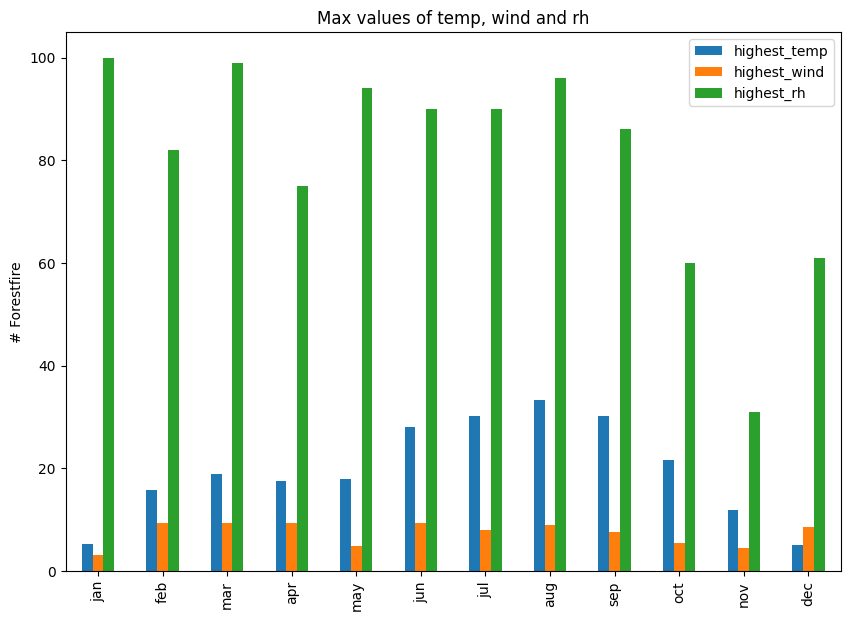

In [ ]:
import matplotlib.pyplot as plt
df_plot = df_combined[['highest_temp', 'highest_wind', 'highest_rh']]
df_plot.plot(kind='bar', figsize=(10,7))
plt.xticks(ticks=range(len(df_combined)), labels=df_combined['month'])
plt.ylabel('# Forestfire')
plt.title('Max values of temp, wind and rh')
plt.show

## **PART II**

In [ ]:
import pandas as pd
import glob
import os
from tabulate import tabulate

df_salary = pd.read_csv('/content/drive/MyDrive/data_analytics/MINIPROJECT_5/employee.csv')
df_department = pd.read_csv('/content/drive/MyDrive/data_analytics/MINIPROJECT_5/department.csv')
df_not_active = pd.read_csv('/content/drive/MyDrive/data_analytics/MINIPROJECT_5/not_active.csv')

In [ ]:
print(df_salary)
print(df_department)
print(df_not_active)

   emp_id  salary
0       1     100
1       2     120
2       3     145
3       4     140
4       5     100
5       6     150
6       7     250
   emp_id department
0       1      sales
1       2      sales
2       3      sales
3       4      sales
4       5  marketing
5       6  marketing
6       7  marketing
   emp_id
0       3
1       7


### **2.1 Find Maximum salary for each department only active employees and output requires `emp_id`**

In [ ]:
df = pd.merge(df_salary, df_department, on='emp_id')
df = pd.merge(df, df_not_active, on='emp_id', how='left', indicator='active')
df['active'] = df['active'].apply(lambda x: 'No' if x == 'both' else 'Yes')
print(tabulate(df, headers='keys', tablefmt='github'))

|    |   emp_id |   salary | department   | active   |
|----|----------|----------|--------------|----------|
|  0 |        1 |      100 | sales        | Yes      |
|  1 |        2 |      120 | sales        | Yes      |
|  2 |        3 |      145 | sales        | No       |
|  3 |        4 |      140 | sales        | Yes      |
|  4 |        5 |      100 | marketing    | Yes      |
|  5 |        6 |      150 | marketing    | Yes      |
|  6 |        7 |      250 | marketing    | No       |


In [ ]:
df_active = df[df['active'] == 'Yes']
max_salary = df_active.loc[df_active.groupby('department')['salary'].idxmax()]
max_salary = max_salary.sort_values(by='salary', ascending=True)
max_salary = max_salary[['emp_id', 'department', 'salary']]
max_salary.columns = ['emp_id', 'department', 'max_salary']
print(tabulate(max_salary, headers='keys', tablefmt='github', showindex=False))

|   emp_id | department   |   max_salary |
|----------|--------------|--------------|
|        4 | sales        |          140 |
|        6 | marketing    |          150 |


### **2.2 All active/inactive employees (=emp_id) and their correspond department maximum salary**

In [ ]:
max_salary = df_active.groupby('department')['salary'].max().reset_index()
max_salary.rename(columns={'salary': 'max_salary'}, inplace=True)
max_salary = pd.merge(df, max_salary, on='department', how='left').reset_index(drop=True)
max_salary = max_salary[['emp_id', 'department', 'max_salary']]
print(tabulate(max_salary, headers='keys', tablefmt='github', showindex=False))

|   emp_id | department   |   max_salary |
|----------|--------------|--------------|
|        1 | sales        |          140 |
|        2 | sales        |          140 |
|        3 | sales        |          140 |
|        4 | sales        |          140 |
|        5 | marketing    |          150 |
|        6 | marketing    |          150 |
|        7 | marketing    |          150 |
